This dataset contains data about lung cancer Mortality and is a comprehensive collection of patient
information, specifically focused on individuals diagnosed with cancer.

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('E:/Projects/Lung_Cancer_Prediction/Notebook/Lung_Cancer.csv')
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [30]:
df.drop(['country','end_treatment_date'], axis=1, inplace=True)

In [31]:
# Optional: check the result
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['id', 'age', 'gender', 'diagnosis_date', 'cancer_stage', 'family_history', 'smoking_status', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type', 'survived']


In [32]:
df.head()

,id,age,gender,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
0,1,64.0,Male,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,0
1,2,50.0,Female,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,1
2,3,65.0,Female,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,0
3,4,51.0,Female,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,0
4,5,37.0,Male,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,0


In [33]:
df.describe()


,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014127,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
print(df.columns)

Index(['id', 'age', 'gender', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'survived'],
      dtype='object')


In [35]:
df.isnull().sum()

id                   0
age                  0
gender               0
diagnosis_date       0
cancer_stage         0
family_history       0
smoking_status       0
bmi                  0
cholesterol_level    0
hypertension         0
asthma               0
cirrhosis            0
other_cancer         0
treatment_type       0
survived             0
dtype: int64

Not any null values

In [36]:
df.duplicated().sum()

np.int64(0)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 890000 non-null  int64  
 1   age                890000 non-null  float64
 2   gender             890000 non-null  object 
 3   diagnosis_date     890000 non-null  object 
 4   cancer_stage       890000 non-null  object 
 5   family_history     890000 non-null  object 
 6   smoking_status     890000 non-null  object 
 7   bmi                890000 non-null  float64
 8   cholesterol_level  890000 non-null  int64  
 9   hypertension       890000 non-null  int64  
 10  asthma             890000 non-null  int64  
 11  cirrhosis          890000 non-null  int64  
 12  other_cancer       890000 non-null  int64  
 13  treatment_type     890000 non-null  object 
 14  survived           890000 non-null  int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 10

# Complete the data cleaning process

Checking Categorical features

In [38]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in 'cancer_stage' variable: ", end=" ")
print(df['cancer_stage'].unique())

print("Categories in 'family_history' variable: ", end=" ")
print(df['family_history'].unique())

print("Categories in 'smoking_status' variable: ", end=" ")
print(df['smoking_status'].unique())

print("Categories in 'treatment_type' variable: ", end=" ")
print(df['treatment_type'].unique())

print("Categories in 'survived' variable: ", end=" ")
print(df['survived'].unique())









Categories in 'gender' variable:  ['Male' 'Female']
Categories in 'cancer_stage' variable:  ['Stage I' 'Stage III' 'Stage IV' 'Stage II']
Categories in 'family_history' variable:  ['Yes' 'No']
Categories in 'smoking_status' variable:  ['Passive Smoker' 'Former Smoker' 'Never Smoked' 'Current Smoker']
Categories in 'treatment_type' variable:  ['Chemotherapy' 'Surgery' 'Combined' 'Radiation']
Categories in 'survived' variable:  [0 1]


# Now lets convert categorical data into numerical 

In [39]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# 1️⃣ Clean column names
df.columns = df.columns.str.strip()

# 2️⃣ Map binary categories
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['family_history'] = df['family_history'].map({'No': 0, 'Yes': 1})

# 3️⃣ Encode cancer_stage using LabelEncoder (Ordinal)
stage_encoder = LabelEncoder()
df['cancer_stage'] = stage_encoder.fit_transform(df['cancer_stage'])

# 4️⃣ OneHotEncode smoking_status
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid dummy trap
smoking_encoded = ohe.fit_transform(df[['smoking_status']])
smoking_df = pd.DataFrame(smoking_encoded, columns=ohe.get_feature_names_out(['smoking_status']))
df = pd.concat([df.drop('smoking_status', axis=1), smoking_df], axis=1)

# 5️⃣ OneHotEncode treatment_type
treatment_encoded = ohe.fit_transform(df[['treatment_type']])
treatment_df = pd.DataFrame(treatment_encoded, columns=ohe.get_feature_names_out(['treatment_type']))
df = pd.concat([df.drop('treatment_type', axis=1), treatment_df], axis=1)

# ✅ Done
print("🎉 Categorical features converted successfully!")
print(df.head())

🎉 Categorical features converted successfully!
   id   age  gender diagnosis_date  cancer_stage  family_history   bmi  \
0   1  64.0       0     2016-04-05             0               1  29.4   
1   2  50.0       1     2023-04-20             2               1  41.2   
2   3  65.0       1     2023-04-05             2               1  44.0   
3   4  51.0       1     2016-02-05             0               0  43.0   
4   5  37.0       0     2023-11-29             0               0  19.7   

   cholesterol_level  hypertension  asthma  cirrhosis  other_cancer  survived  \
0                199             0       0          1             0         0   
1                280             1       1          0             0         1   
2                268             1       1          0             0         0   
3                241             1       1          0             0         0   
4                178             0       0          0             0         0   

   smoking_status_For

In [40]:

df.head()



,id,age,gender,diagnosis_date,cancer_stage,family_history,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery
0,1,64.0,0,2016-04-05,0,1,29.4,199,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,50.0,1,2023-04-20,2,1,41.2,280,1,1,0,0,1,0.0,0.0,1.0,0.0,0.0,1.0
2,3,65.0,1,2023-04-05,2,1,44.0,268,1,1,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0
3,4,51.0,1,2016-02-05,0,0,43.0,241,1,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,37.0,0,2023-11-29,0,0,19.7,178,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0


In [41]:
print(df.columns.tolist())

['id', 'age', 'gender', 'diagnosis_date', 'cancer_stage', 'family_history', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'survived', 'smoking_status_Former Smoker', 'smoking_status_Never Smoked', 'smoking_status_Passive Smoker', 'treatment_type_Combined', 'treatment_type_Radiation', 'treatment_type_Surgery']


# Visualize with Seaborn, Matplotlib, etc.

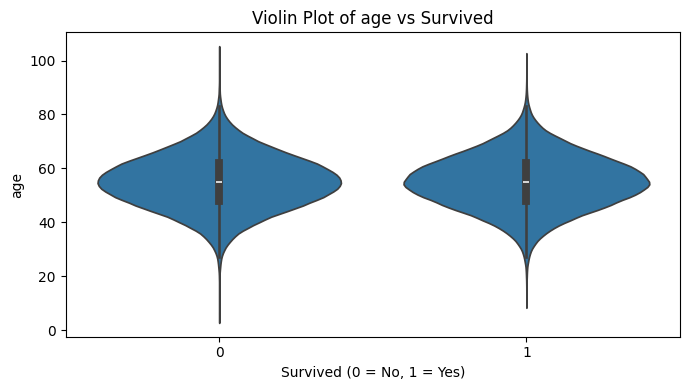

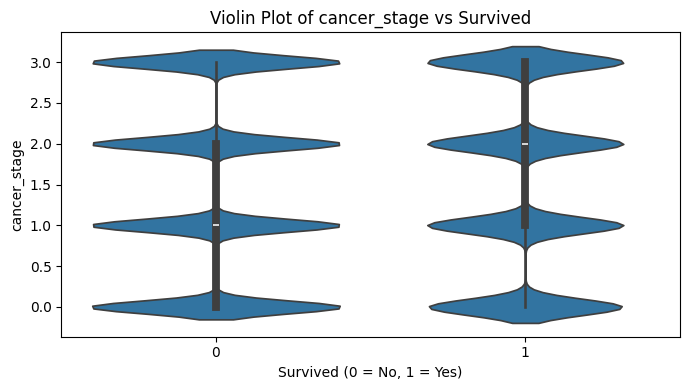

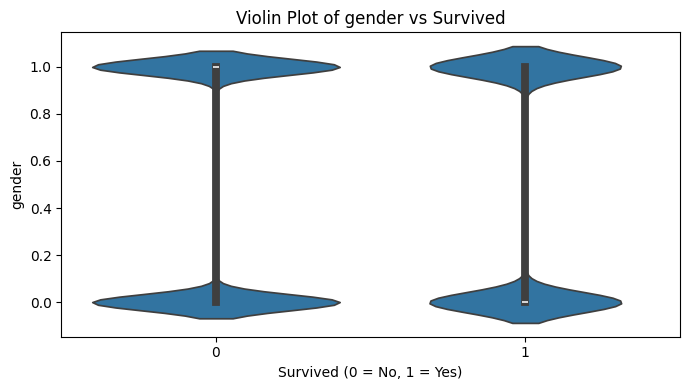

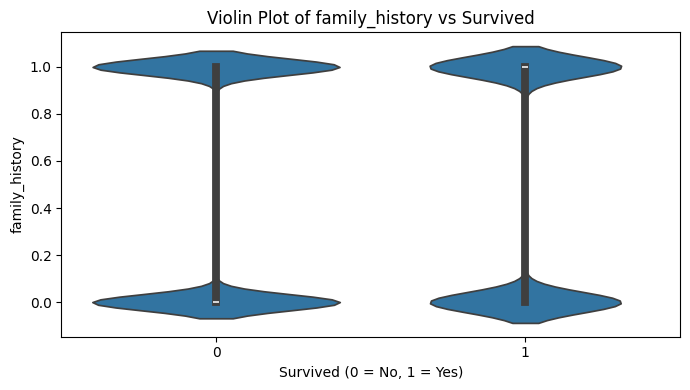

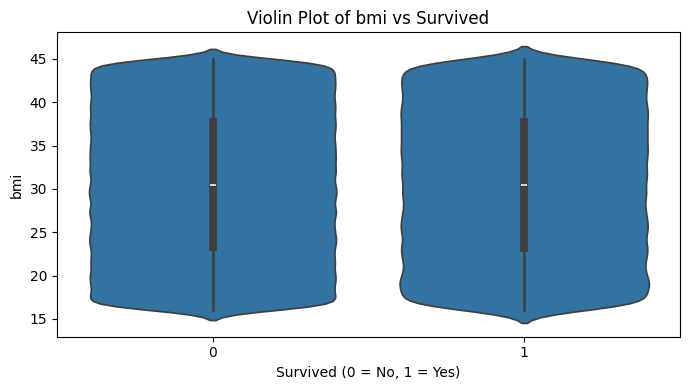

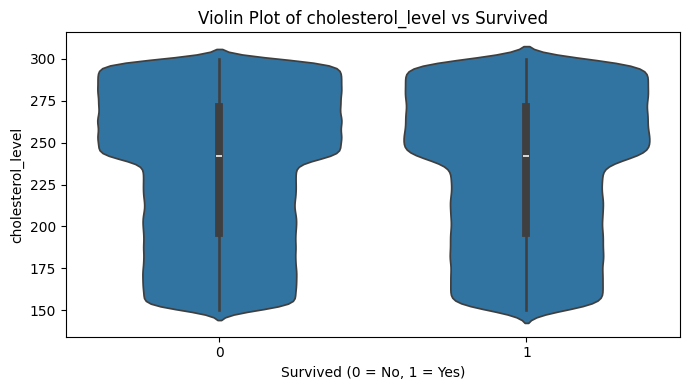

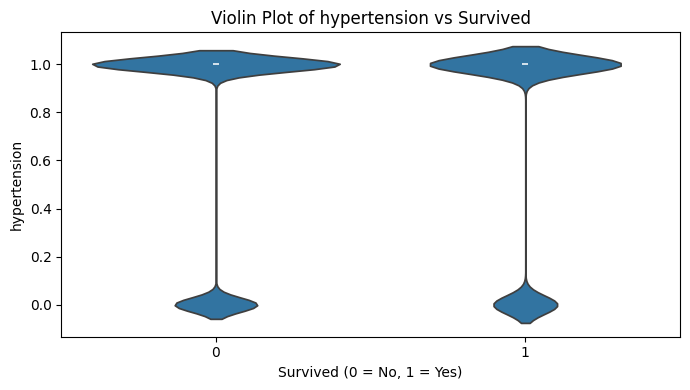

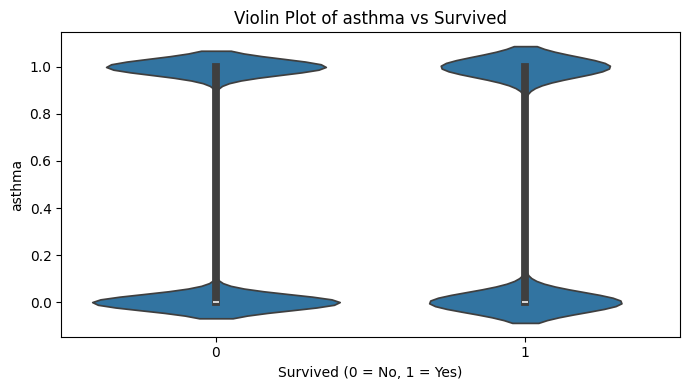

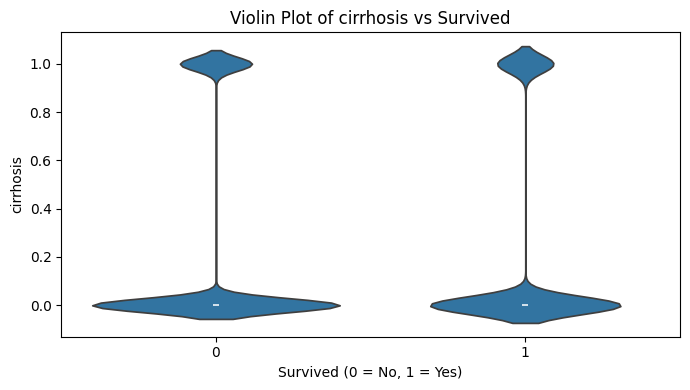

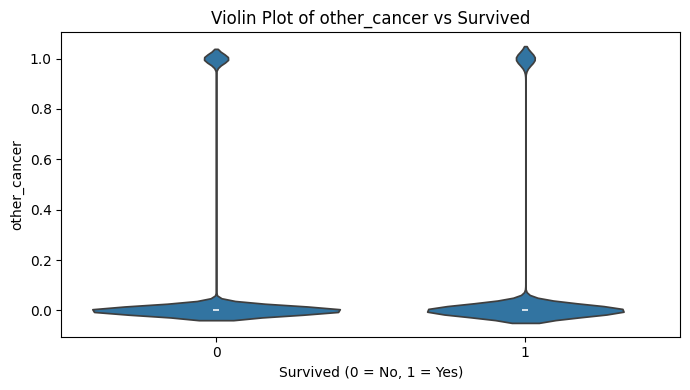

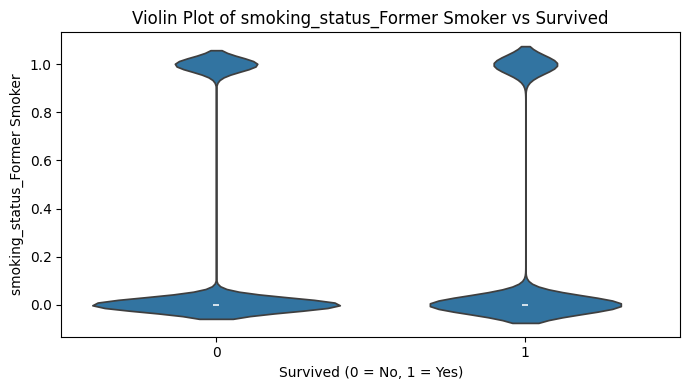

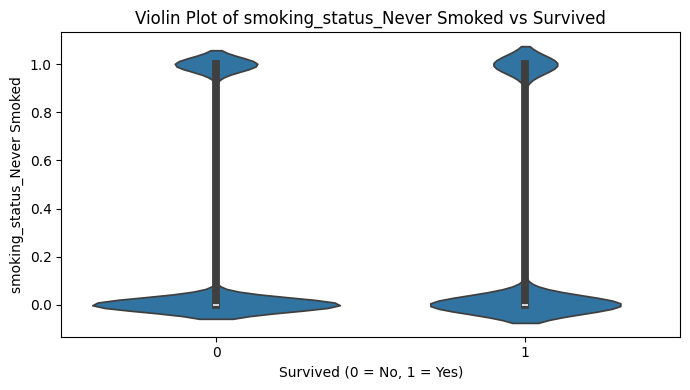

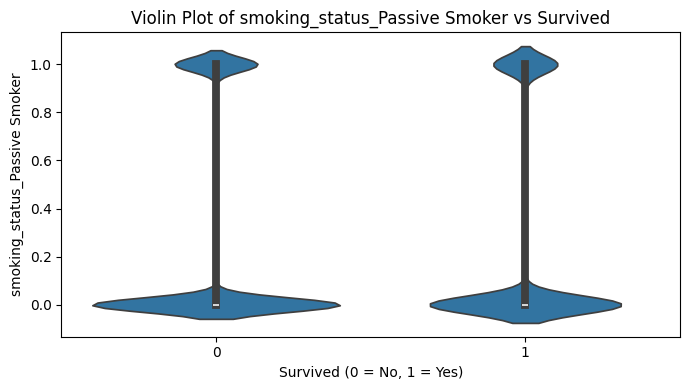

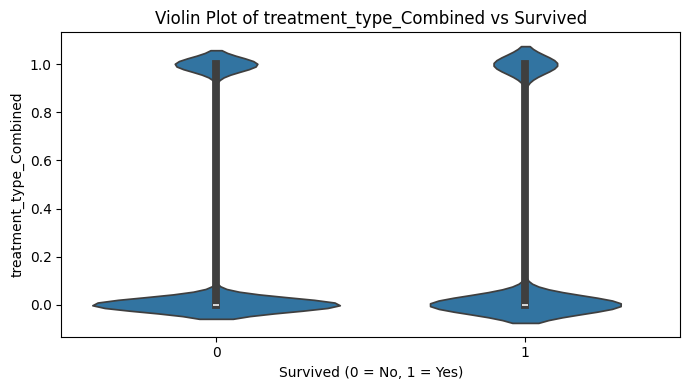

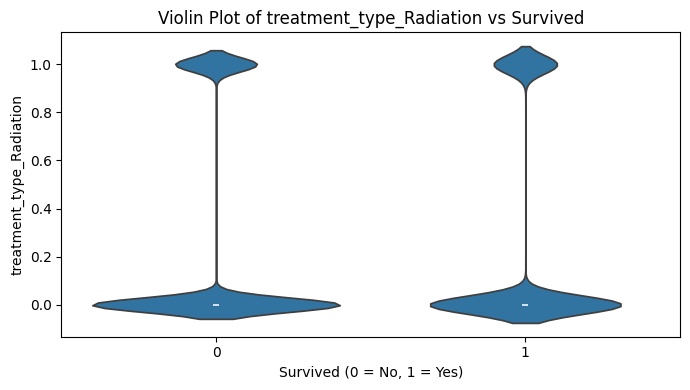

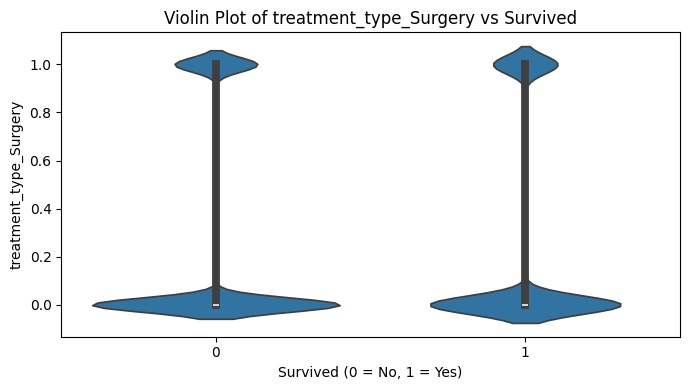

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🎯 Features to compare against survival
features = ['age', 'cancer_stage', 'gender', 'family_history', 'bmi',
            'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer',
            'smoking_status_Former Smoker', 'smoking_status_Never Smoked',
            'smoking_status_Passive Smoker',
            'treatment_type_Combined', 'treatment_type_Radiation', 'treatment_type_Surgery']

# 📊 Loop to create violin plots
for feature in features:
    plt.figure(figsize=(7, 4))
    sns.violinplot(x='survived', y=feature, data=df)
    plt.title(f'Violin Plot of {feature} vs Survived')
    plt.xlabel('Survived (0 = No, 1 = Yes)')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


# Train and split the Data

In [43]:
# Split the dataset into training and testing sets


from sklearn.model_selection import train_test_split

# 🎯 1. Separate features and target
X = df.drop(['survived', 'diagnosis_date'], axis=1)  # All features
y = df['survived']               # Target label

# ✂️ 2. Split into training and testing sets (75%-25%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,    # ensures reproducible split
    stratify=y          # optional: keeps class ratio balanced in both sets
)

# ✅ 3. Check sizes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))
print("y_test distribution:\n", y_test.value_counts(normalize=True))


X_train shape: (667500, 17)
X_test shape: (222500, 17)
y_train distribution:
 survived
0    0.779771
1    0.220229
Name: proportion, dtype: float64
y_test distribution:
 survived
0    0.779771
1    0.220229
Name: proportion, dtype: float64


In [44]:
X.head()

,id,age,gender,cancer_stage,family_history,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery
0,1,64.0,0,0,1,29.4,199,0,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,50.0,1,2,1,41.2,280,1,1,0,0,0.0,0.0,1.0,0.0,0.0,1.0
2,3,65.0,1,2,1,44.0,268,1,1,0,0,1.0,0.0,0.0,1.0,0.0,0.0
3,4,51.0,1,0,0,43.0,241,1,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,37.0,0,0,0,19.7,178,0,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0


In [45]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [47]:
param_grid = {
    'rf__n_estimators': [50, 100],   # instead of 100, 200, 500, ...
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
}


# Hyperparameter Tuning

In [53]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

# ✅ Use imblearn's Pipeline to add SMOTE
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=10,
    cv=2,
    n_jobs=-1,
    verbose=2,
    scoring='f1',
    random_state=42
)

random_search.fit(X_train, y_train)

y_pred = random_search.predict(X_test)

print("Best Parameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Parameters: {'rf__n_estimators': 50, 'rf__min_samples_split': 2, 'rf__max_depth': None}
Accuracy: 0.7646067415730337
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.87    173499
           1       0.22      0.03      0.05     49001

    accuracy                           0.76    222500
   macro avg       0.50      0.50      0.46    222500
weighted avg       0.66      0.76      0.69    222500



In [54]:
y_pred = random_search.predict(X_test)

# ✅ Evaluate
print("Best Parameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




Best Parameters: {'rf__n_estimators': 50, 'rf__min_samples_split': 2, 'rf__max_depth': None}
Accuracy: 0.7646067415730337
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.87    173499
           1       0.22      0.03      0.05     49001

    accuracy                           0.76    222500
   macro avg       0.50      0.50      0.46    222500
weighted avg       0.66      0.76      0.69    222500

